In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

[ 1.16319078  2.03134396  2.89949713  3.7676503   4.63580347  5.50395665
  6.37210982  7.24026299  8.10841616  8.97656934  9.84472251 10.71287568
 11.58102885 12.44918203 13.3173352  14.18548837 15.05364154 15.92179472
 16.78994789 17.65810106] [ 10.94480872  -0.03139283   6.97738489  18.68267683 -10.25349095
   3.3558473   -0.96096445  13.38390289   1.80353342  12.45050467
   8.32596566   4.66868476   3.98799145  12.12643067  -1.81550837
  19.44839379 -10.5923948    6.94911907  11.64636288  13.50626817]
[1.70741245 2.44858284 6.05311552 6.0996796  8.16721375]
[1.72601084 9.62715476 6.84460555 4.9821204  1.26631562]


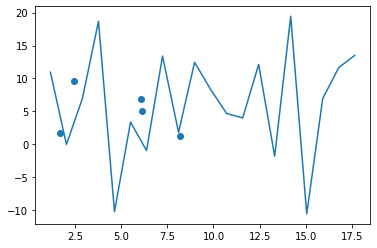

In [10]:
def read_data(filename):
    file = open(filename, 'r')
    inputData = [float(line) for line in file]
    file.close()
    return inputData

def write_data(filename, outputVec):
    file = open(filename, 'w')
    for ans in outputVec:
        file.write(str(ans) + '\n')
    file.close()
    return

def sweep(n, a, b, c, f):
    alpha = np.zeros(n)
    beta = np.zeros(n)
    for i in range(n - 1):
        d = a[i] * alpha[i] + b[i]
        alpha[i + 1] = -c[i] / d
        beta[i + 1] = (f[i] - a[i] * beta[i]) / d
    x = np.zeros(n)
    x[n - 1] = beta[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x

def generateSpline(x, y):
#    n = x.shape[0] - 1
    h = (x[n - 1] - x[0]) / n
    a = np.array([0] + [1] * (n - 2) + [0])
    b = np.array([1] + [4] * (n - 2) + [1])
    c = np.array([0] + [1] * (n - 2) + [0])
    f = np.zeros(n)
    for i in range(1, n - 1):
        f[i] = 3 * (y[i - 1] - 2 * y[i] + y[i + 1]) / h ** 2
    s = sweep(n + 1, a, b, c, f)
    A = np.zeros(n + 1)
    B = np.zeros(n + 1)
    C = np.zeros(n + 1)
    D = np.zeros(n + 1)
    for i in range(n - 1):
        B[i] = s[i]
        A[i] = (B[i + 1] - B[i]) / (3 * h)
        C[i] = (y[i + 1] - y[i]) / h - (B[i + 1] + 2 * B[i]) * h / 3
        D[i] = y[i]
    return A, B, C, D

def P(z):
    i = int(z)
    diff = z - x[i]
    return A[i] * diff ** 3 + B[i] * diff ** 2 + C[i] * diff + D[i]

x = np.array(read_data("train3.dat"))
y = np.array(read_data("train.ans"))
z = np.array(read_data("test.dat"))
m = len(z)
n = len(x)

A, B, C, D = generateSpline(x, y)

#m = int(input())
#z = sorted(np.array([random.uniform(x[0], x[n - 1]) for i in range(m)]))
ans = np.zeros(m)
print(x, y)
print(z)
plt.plot
for i in range(m):
    ans[i] = P(z[i])
print(ans)
write_data("test.ans", ans)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(z, ans)
ax.plot(x, y)
